<p style="font-family: Arial; font-size:2.70em;color:purple; font-style:bold">
Classification of Breast Cancer Data 
<br>
</p>

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Breast Cancer Analysis</p>

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/.

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Importing the Necessary Libraries<br></p>

In [60]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Creating a Pandas DataFrame from a CSV file<br></p>


In [2]:
data = pd.read_csv('./breast-cancer.csv')
data.head()


,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">Breast Cancer Data Description</p>
<br>
This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. Thanks go to M. Zwitter and M. Soklic for providing the data. <br><br>
Let's now add column labels to all columns in the data.

In [3]:
data_index = [ 'Class', 'age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
data.columns = data_index
data.head()


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">Data Variables</p>
<br>Each row in data.csv contains an individual case of a woman with breastcancer. There are 285 cases in this data set. The data set is available from UCI repository (http://archive.ics.uci.edu/ml/datasets/Breast+Cancer) <br>

<br>
Each row, or sample consists of the following attributes:
* **1. Age:** age (in years at last birthday) of the patient at the time of diagnosis;
* **2. Menopause:** whether the patient is pre- or postmenopausal at time of diagnosis; 
* **3. Tumor size:** the greatest diameter (in mm) of the excised tumor; 
* **4. Inv-nodes:** the number (range 0 - 39) of axillary lymph nodes that contain metastatic breast cancer visible on histological examination;
* **5. Node caps:** if the cancer does metastasise to a lymph node, although outside the original site of the tumor it may remain “contained” by the capsule of the lymph node. However, over time, and with more aggressive disease, the tumor may replace the lymph node and then penetrate the capsule, allowing it to invade the surrounding tissues; (yes = 1, no = 0)
* **6. Degree of malignancy:** the histological grade (range 1-3) of the tumor. Tumors that are grade 1 predominantly consist of cells that, while neoplastic, retain many of their usual characteristics. Grade 3 tumors predominately consist of cells that are highly abnormal; 
* **7. Breast:** breast cancer may obviously occur in either breast(left = 1, right = 2)
* **8. Breast quadrant:** the breast may be divided into four quadrants, using the nipple as a central point;(left_up = 1, left_low = 2, right_up = 3, right_low = 4, central = 5)
* **9. Irradiation:** radiation therapy is a treatment that uses high-energy x-rays to destroy cancer cells.(yes = 1, no = 0) 



In [19]:
##### data
#data[data['breast-quad'].str.contains('left') & data['breast'].str.contains('right')]
#data.head()

Find any null variables if they exist

In [6]:
data[data.isnull().any(axis = 1)]

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Cleaning and Preparing the Data <br></p>
<br>
Binarize node-caps & irradiat columns

In [7]:
CleanData = data.copy()

#Binarize node-caps & irradiat& Class
CleanData['node-caps']= (CleanData['node-caps']=='yes').astype(int)
CleanData['irradiat']= (CleanData['irradiat']=='yes').astype(int)
CleanData['Class']= (CleanData['Class']=='recurrence-events').astype(int)

CleanData.head()

#Convert *Breast Quadrant* string descriptive Information into number.
#Create a Dictionary of the mapping & Replace Values
quad = {'left_up':1, 'left_low': 2, 'right_up':3, 'right_low':4, 'central':5} 
CleanData = CleanData.replace({'breast-quad': quad})
CleanData['breast-quad'] = CleanData['breast-quad'].apply(pd.to_numeric, downcast='float', errors='coerce')
CleanData[CleanData.isnull().any(axis = 1)]
CleanData = CleanData.dropna()
CleanData.head()


#Convert *Breast* string descriptive Information into number (Left = 1, Right = 2)
#Create a Dictionary of the mapping & Replace Values
breast = {'left':1, 'right':2} 
CleanData = CleanData.replace({'breast': breast})
CleanData.head()

#Convert *menopause* string descriptive Information into number.
#Create a Dictionary of the mapping & Replace Values
menopause = {'premeno':1, 'ge40': 2, 'lt40':3} 
CleanData = CleanData.replace({'menopause': menopause})
CleanData.head()


#Convert 'inv-nodes' to the median of its average range.
nodes = {'0-2':1, '3-5':4,'6-8':7,'9-11':10, '12-14':13,'15-17':16,'18-20':19,'21-23':22,'24-26':25,'27-29':28,'30-32':31,'33-35':34,
        '36-38':37,'39':39}
CleanData = CleanData.replace({'inv-nodes': nodes})
(CleanData['inv-nodes'].describe)


#Convert age to the numerical average of its average range.
age = {'20-29':24.5, '30-39':34.5,'40-49':44.5,'50-59':54.5, '60-69':64.5,'70-79':74.5,'80-89':84.5,'90-99':94.5}
CleanData = CleanData.replace({'age': age})
CleanData.head()

,
#Convert tumor-size to the numerical average of its average range.
Tumor = {'0-4':2, '5-9':7,'10-14':12,'15-19':17, '20-24':22,'25-29':27,'30-34':32,'35-39':37,'40-44':42,'45-49':47,'50-54':52}
CleanData = CleanData.replace({'tumor-size': Tumor})
CleanData.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,44.5,1,22,1,0,2,2,3.0,0
1,0,44.5,1,22,1,0,2,1,2.0,0
2,0,64.5,2,17,1,0,2,2,1.0,0
3,0,44.5,1,2,1,0,2,2,4.0,0
4,0,64.5,2,17,1,0,2,1,2.0,0


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Data Visualisation <br></p>
<br>


Class
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

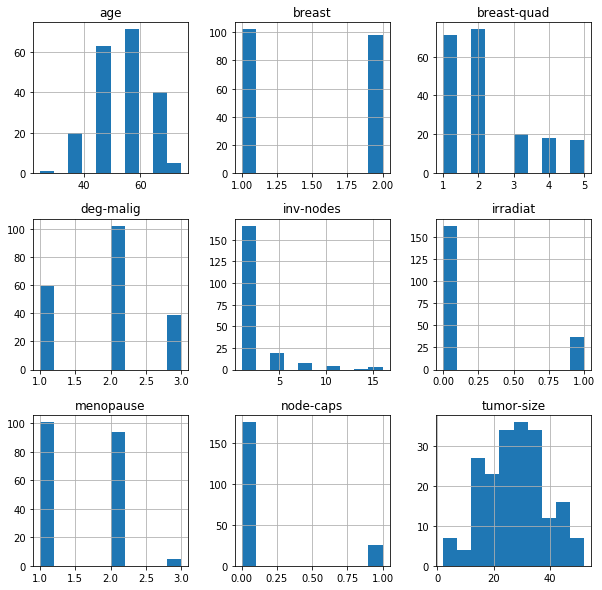

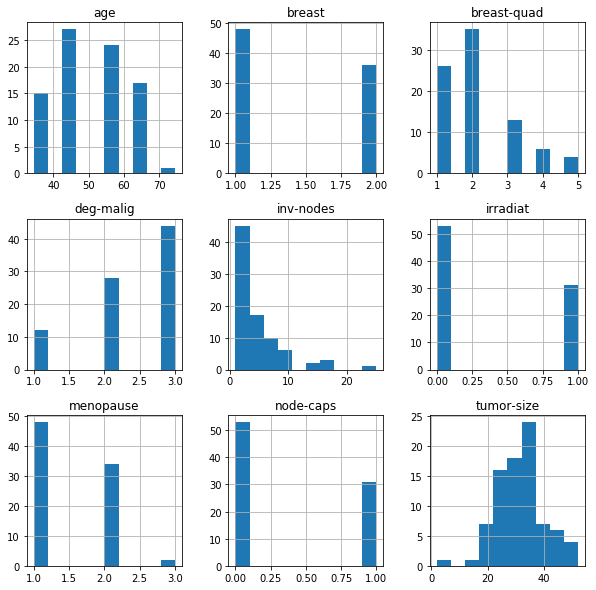

In [8]:
CleanData.groupby('Class').hist(figsize=(10, 10))

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
********************** Commence Classification Task**************************** <br></p>



We aim to classify patient data by the Class of Recurrence Event vs Non-Recurrence Events. This target variable is stored in 'y'.



In [9]:
Output=CleanData['Class']


In [10]:
Output.dtype



dtype('int32')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Use Cancer Characteristics & other gynechological details to predict<br><br> the possibility of Breast Cancer Recurrence in Women. 
<br><br></p>


In [81]:
features_list = ['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig']

In [82]:
features = CleanData[features_list]


In [83]:
features.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig
0,44.5,1,22,1,0,2
1,44.5,1,22,1,0,2
2,64.5,2,17,1,0,2
3,44.5,1,2,1,0,2
4,64.5,2,17,1,0,2


In [84]:
Output.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int32

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Perform Test and Train split

<br><br></p>



## REMINDER: Training Phase

In the **training phase**, the learning algorithm uses the training data to adjust the model’s parameters to minimize errors.  At the end of the training phase, you get the trained model.


<BR>
In the **testing phase**, the trained model is applied to test data.  Test data is separate from the training data, and is previously unseen by the model.  The model is then evaluated on how it performs on the test data.  The goal in building a classifier model is to have the model perform well on training as well as test data.


In [106]:
features_train, features_test, Output_train, Output_test = train_test_split(features, Output, test_size = 0.33, random_state = 324)


In [96]:
print("Number instances in features_train dataset: ", features_train.shape)
print("Number instances in Output_train dataset: ", Output_train.shape)
print("Number instances in features_test dataset: ", features_test.shape)
print("Number instances in Output_test dataset: ", Output_test.shape)

Number instances in features_train dataset:  (198, 6)
Number instances in Output_train dataset:  (198,)
Number instances in features_test dataset:  (86, 6)
Number instances in Output_test dataset:  (86,)


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

SMOTE Technique to address Data Imbalance

<br><br></p>

In [71]:
print("Before OverSampling, counts of Recurrent Class '1': {}".format(sum(Output_train==1)))
print("Before OverSampling, counts of No-Recurrent Class '0': {} \n".format(sum(Output_train==0)))

Before OverSampling, counts of Recurrent Class '1': 53
Before OverSampling, counts of No-Recurrent Class '0': 137 



Resampling using SMOTE

In [97]:
sm = SMOTE(random_state=2)
features_train_res, Output_train_res = sm.fit_sample(features_train, Output_train)

In [98]:
print('After OverSampling, the shape of features_X: {}'.format(features_train_res.shape))
print('After OverSampling, the shape of Output_y: {} \n'.format(Output_train_res.shape))

print("After OverSampling, counts of Recurrent Class '1': {}".format(sum(Output_train_res==1)))
print("After OverSampling, counts of Non-Recurrent Class '0': {}".format(sum(Output_train_res==0)))

After OverSampling, the shape of features_X: (286, 6)
After OverSampling, the shape of Output_y: (286,) 

After OverSampling, counts of Recurrent Class '1': 143
After OverSampling, counts of Non-Recurrent Class '0': 143


In [100]:
# Check features of the training and testing sets.

#type(features_train)
features_train.dtypes
#type(features_test)
#type(Output_train)
#Output_train.dtype
#type(Output_test)
#features_train.describe()
#Output_train.describe()

age           float64
menopause       int64
tumor-size      int64
inv-nodes       int64
node-caps       int32
deg-malig       int64
dtype: object

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Fit on Train Set
<br><br></p>


In [101]:
#Trying Different Types of Classifiers
#1.Decision Tree Classifier
#recurrence_classifier = DecisionTreeClassifier(max_leaf_nodes=19, random_state=0)

#2. Logistic Regression
#recurrence_classifier = LogisticRegression(random_state = 0)

#3. K-Nearest Neighbours
#recurrence_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

#4.Support Vector Classification
#recurrence_classifier = SVC(kernel = 'linear', random_state = 0)

#4.Gaussian Naïve Bayes Algorithm
recurrence_classifier = GaussianNB()

#5.Random Forest Algorithm
#recurrence_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

#****************************FITTING CLASSIFIER ON TRAINING SET******************************
recurrence_classifier.fit(features_train_res, Output_train_res)

GaussianNB(priors=None)

In [75]:
type(recurrence_classifier)


sklearn.naive_bayes.GaussianNB

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Predict on Test Set 

<br><br></p>


In [102]:
ModelPredictions = recurrence_classifier.predict(features_test)

In [103]:
ModelPredictions[:10]

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [104]:
#Indicator_test['high_humidity_label'][:10]
Output_test.head(10)

53     0
231    1
200    1
8      0
62     0
26     0
11     0
155    0
36     0
31     0
Name: Class, dtype: int32

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Measure Accuracy of the Classifier
<br><br></p>


In [105]:
#Model Accuracy per different Algorithms:


#1.#Decscion Tree Classifier: 64.27%
#2.#Logistic Regression: 73.17%
#3.#KNearest Neighbour: 67.54%%
#4.#Support Vector Machine Model (SVC): 70%
#5.#Gaussian Naive Bayes Algorithm: 73.17%
#6. #Random Forest Classifier: 70.21%

accuracy_score(y_true = Output_test, y_pred = ModelPredictions)
confusion_matrix(y_true = Output_test, y_pred = ModelPredictions)
print(classification_report(y_true = Output_test, y_pred = ModelPredictions))

             precision    recall  f1-score   support

          0       0.74      0.81      0.77        57
          1       0.54      0.45      0.49        29

avg / total       0.67      0.69      0.68        86

